 # Bài tập thực hành tuần 2
 ## Bài tập 1
 * Thực hành trên Python tính phương trình hồi quy đơn (trang 114 - 117 sách Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition).

 # 1. Tạo data-set có dạng tuyến tính
 Import thư viện

In [23]:
import numpy as np 
print('Import numpy successfully')

Import numpy successfully


 Tạo data-set

In [10]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) 

 Xem sơ lượt về dataset đã được tạo ra
 5 phần tử đầu tiên của X

In [11]:
for i in range(5):  
    print(X[i])

[1.54068964]
[1.07342524]
[1.99038426]
[1.37579435]
[1.55799291]


 5 phần tử đầu tiên cua của y

In [12]:
for i in range(5): 
    print(y[i])

[8.28446064]
[8.85406612]
[10.6861362]
[9.22518471]
[8.45801196]


 Vẽ đồ thị thể hiện sự tương quan giữa X và y

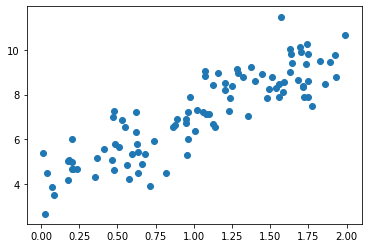

In [13]:
plt.scatter(X,y)

 # 2.Bắt đầu từ đây, ta sẽ tiến hành tính toán $\hat{\theta}$ sử dụng Normal Equation

 Tiến hành bổ sung x0 = 1 vào ma trận X

In [14]:
X_b = np.c_[np.ones((100,1)),X]
for i in range(5): 
    print(X_b[i])

[1.         1.54068964]
[1.         1.07342524]
[1.         1.99038426]
[1.         1.37579435]
[1.         1.55799291]


 Tiến hành tính toán theo công thức
 $\hat{\theta}$ = $(X^T X)^{-1} X^T y $

In [15]:
min_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(min_theta)

[[4.0556377 ]
 [2.98304862]]


 Tiến hành tính toán theo công thức
 $\hat{\theta}$ = $(X^T X)^{-1} X^T y $

In [16]:
min_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(min_theta)

[[4.0556377 ]
 [2.98304862]]


 Từ đây ta có thể làm tròn ${\theta}_0$, ${\theta}_1$ và
 thầy rằng ${\theta}_0$ = 4 và ${\theta}_1$ = 3 đã dự đoán
 gần đúng phương trình mà ta đã sử dụng ban đầu

 Ta sẽ tiến hành sử dụng $\hat{\theta}$ để kiểm nghiệm
 tính đúng đắn với bộ X = {0,2}

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 column  
y_predict = X_new_b.dot(min_theta) 
y_predict 

array([[ 4.0556377 ],
       [10.02173495]])

 Vẽ đồ thị thể hiện dự đoán của phương trình hồi quy
 tuyến tính

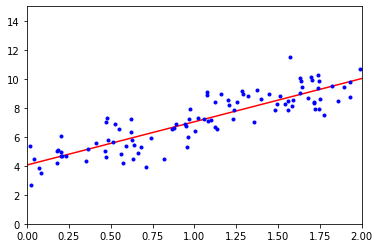

In [18]:
plt.plot(X_new, y_predict, "-r")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show() 

# 3.Sử dụng thư viện Scikit-learn

Ta sẽ sử dụng thư viên Scikit-learn để tính toán và so sánh kết quả giữa việc sử dụng thư viện và code 

In [19]:
from sklearn.linear_model import LinearRegression 
print('Import Linear Regression successfully')

Import Linear Regression successfully


Tiến hành tính toán ${\theta}_0$ và ${\theta}_1$ trong trường hợp ở đây sẽ là kết quả trả về lần lượt của 2 hàm coef_ và intercept_

In [20]:
lin_reg = LinearRegression() 
lin_reg.fit(X,y) #Perform fitting dimension of the X,y matrices
lin_reg.intercept_, lin_reg.coef_ #coeff_ estimated coefficient for theta, in this case theta1 
                                  #intercept_ estimated the intercept, in this case theta0

(array([4.0556377]), array([[2.98304862]]))

Sau khi tính toán được ${\theta}_0$ và ${\theta}_1$, tiến hành tính toán kết quả sẽ nhận được từ dự đoán bằng bộ thử X_new = {0,2}

In [21]:
y_new = lin_reg.predict(X_new) 

Vẽ đồ thị thể hiện prediction của model 


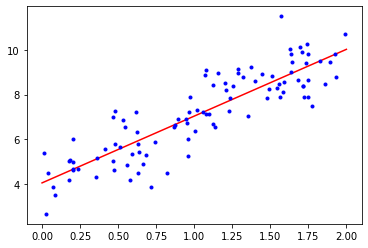

In [22]:
plt.plot(X_new, y_new, "r-")
plt.plot(X,y,"b.")

Ta có thể thấy được rằng kết quả giữa việc xây dựng lại toàn bộ và việc áp dụng thư viện cho kết quả không chênh lệch nhau nhiều. Tuy nhiên việc áp dụng thư viện lại khiến xây dựng Linear Regression model nhanh và thuận tiện hơn nhiều 